# Defining goals
The goal of this workbook is to compile one clean dataset combining all resources from BTS and kerosene jet prices to see which has an effect and which does not. Furthermore, this will be exported for other visualizatoins.

In [1]:
# IMPORT STATEMENTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
# IMPORT CLEANSET FUNC
from cleanSet.cleanSet import cleanSet
from cleanSet.timeSeriesEda import timeSeriesEda

KARPSAC jet fuel prices to know U.S. jet fuel prices.

In [3]:
# SAVE KAPRSAC JET FUEL PRICES IN A DATAFRAME
jet_fuel = pd.read_csv("data-sources/KARPSAC-jetfuelprices-2010to2020.csv", sep=";") # original data set
# CLEAN UP DATA TO PERFORM GROUPBY ANALYSIS
jet_fuel['YEAR'] = jet_fuel['Date'].astype(str).str[0:4]
jet_fuel['MONTH'] = jet_fuel['Date'].astype(str).str[5:7]
del jet_fuel['Date']

In [4]:
#CHANGE NUMERICAL MONTH TO MONTHS
month_lookup = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
                '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October',
                '11': 'November','12': 'December'}
jet_fuel['MONTH'] = jet_fuel['MONTH'].apply(lambda x: month_lookup[x])
jet_fuel['MONTH YEAR'] = jet_fuel['MONTH'] + ' ' +  jet_fuel['YEAR']
jet_fuel.set_index('MONTH YEAR')
# FIND MEAN OF THESE PRICES
jet_fuel = jet_fuel.groupby(['MONTH YEAR']).mean()
jet_fuel

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
MONTH YEAR,
April 1990,0.540045
April 1991,0.552773
April 1992,0.545238
April 1993,0.551158
April 1994,0.469050
...,...
September 2015,1.392952
September 2016,1.321000
September 2017,1.778789


BTS PASSENGER flight departure data.

In [17]:
# IMPORT BTS DOMESTICS DATA DEPARTURES PERFORMED
dom_flight = pd.read_csv('data-sources/USCarrier_Traffic_DOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/USCarrier_Traffic_INTL.csv', sep='","', engine='python', skiprows=1)

combined_flight = cleanSet(dom_flight, intl_flight, 'combined_flight', 'Total Dom. Passenger Flights',
                          'Total Intl. Passenger Flights', 'Total Passenger Flights')

combined_flight

,Total Dom. Passenger Flights,Total Intl. Passenger Flights,Total Passenger Flights
PERIOD,,,
January 2000,623794,51459,675253
February 2000,605936,49157,655093
March 2000,667027,54263,721290
April 2000,635767,52826,688593
May 2000,672835,55358,728193
...,...,...,...
December 2019,729109,74909,804018
January 2020,708984,73377,782361
February 2020,668537,67801,736338


BTS Passenger passenger enplanement data.

In [30]:
# IMPORT BTS DOMESTICS DATA DEPARTURES PERFORMED
# define datasets
dom_flight = pd.read_csv('data-sources/USCarrier_Traffic_cargo_DOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/USCarrier_Traffic_cargo_INTL.csv', sep='","', engine='python', skiprows=1)

combined_enplanements = cleanSet(dom_flight, intl_flight, 'cleaned_enplanements', 'Total Dom. Passenger Enplanements', 'Total Intl. Passenger Enplanements', 'Total Passenger Enplanements')
combined_enplanements

,Total Dom. Passenger Enplanements,Total Intl. Passenger Enplanements,Total Passenger Enplanements
PERIOD,,,
January 2000,954,10423,11377
February 2000,985,10639,11624
March 2000,1060,11598,12658
April 2000,1143,10558,11701
May 2000,1095,12209,13304
...,...,...,...
December 2019,56928,14118,71046
January 2020,48607,15027,63634
February 2020,44918,13646,58564


BTS CARGO flight departure data.

## EDA on new dataset

In [33]:
fig_1 = timeSeriesEda(combined_enplanements, "Time analysis total passenger enplanements",
                     'Total Passenger Enplanements')

NameError: name 'sns' is not defined

Hit a dip during 9/11. Has seasonality as well, although demand has not drastically decreased during COVID and has mostly remained the same.

Text(0.5, 1.0, 'Time analysis total domestic flight cargo departures')

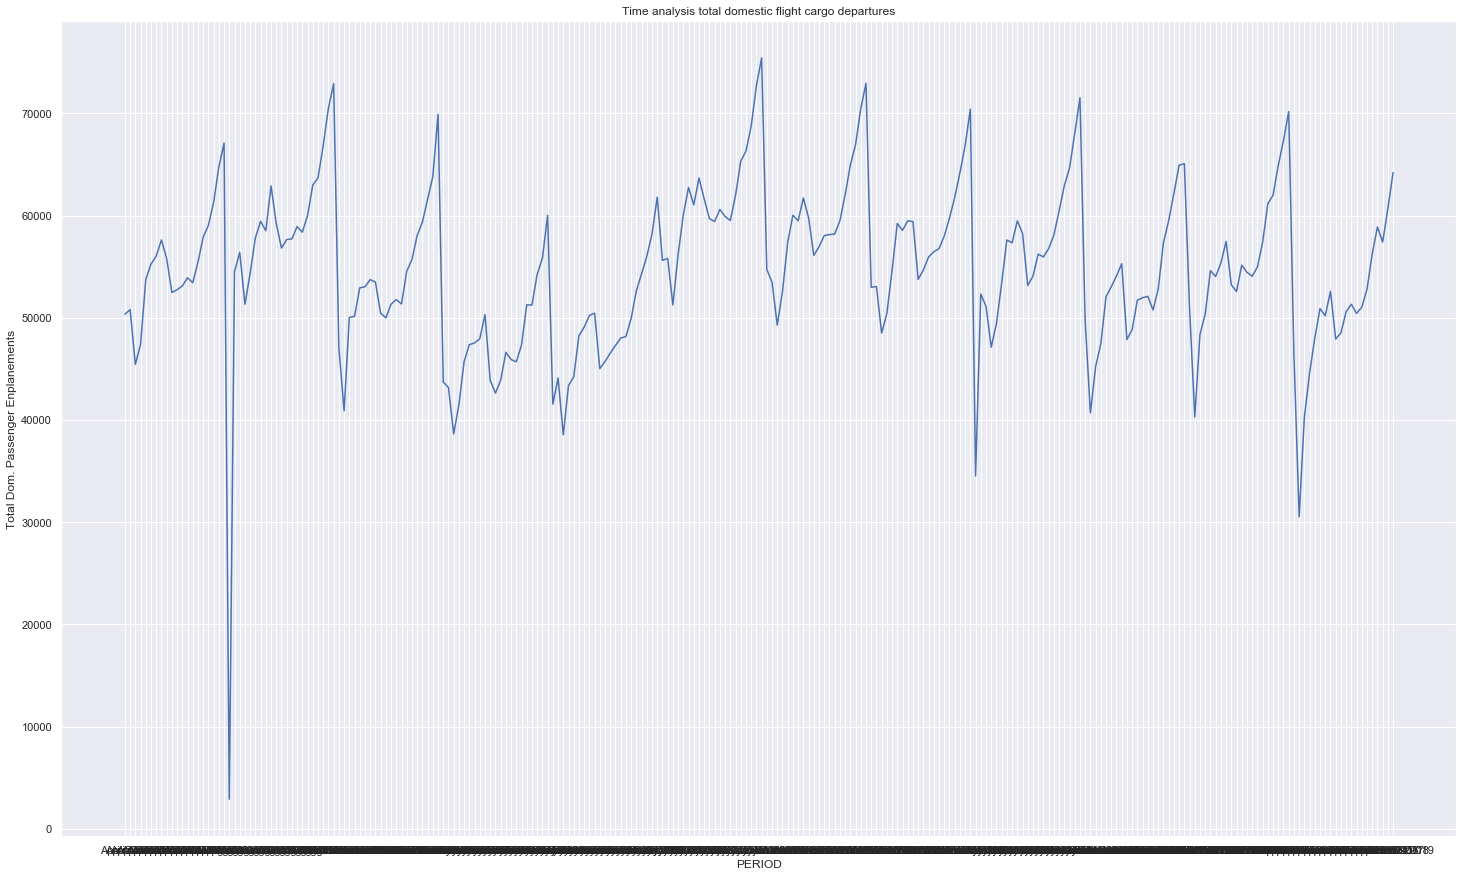

In [20]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_enplane.index, y=combined_enplane['Total Dom. Passenger Enplanements'].astype(float))

plt.title("Time analysis total domestic flight cargo departures")

Text(0.5, 1.0, 'Time analysis total domestic flight cargo departures')

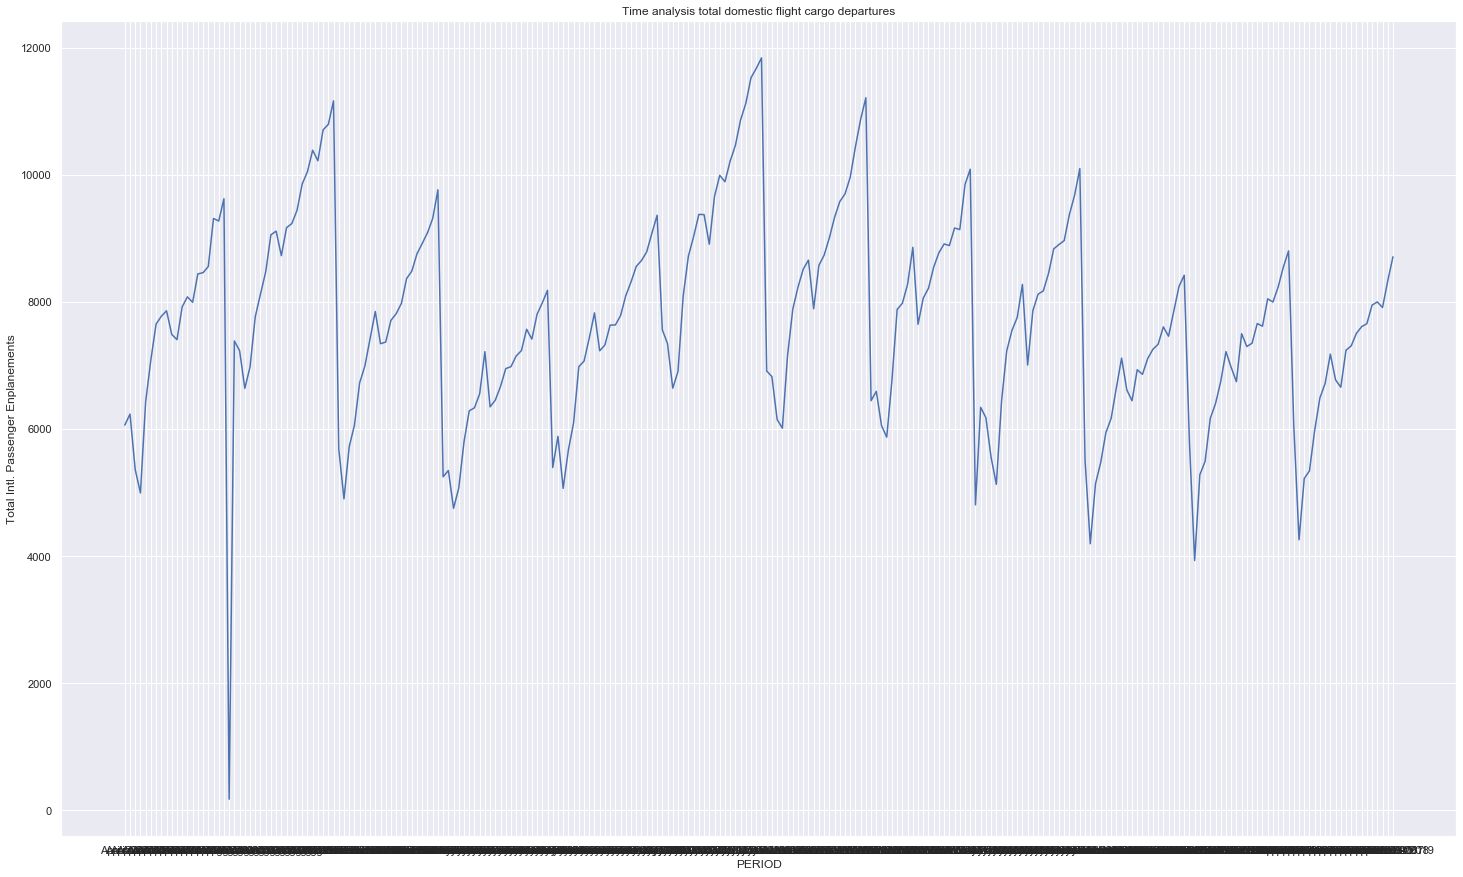

In [21]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_enplane.index, y=combined_enplane['Total Intl. Passenger Enplanements'].astype(float))

plt.title("Time analysis total domestic flight cargo departures")

All showed dips in 2001. All hold similar shapes, but none are drastically worse. In fact, international flights are trending HIGHER this year.

In [18]:
# IMPORT BTS DOMESTICS DATA DEPARTURES PERFORMED
dom_flight = pd.read_csv('data-sources/USCarrier_Traffic_cargo_DOM.csv', sep='","', engine='python', skiprows=1)
intl_flight = pd.read_csv('data-sources/USCarrier_Traffic_cargo_INTL.csv', sep='","', engine='python', skiprows=1)

combined_cargo = cleanSet(dom_flight, intl_flight, 'combined_cargo',
                         'Total Dom. Cargo Flights', 'Total Intl. Cargo Flights',
                         'Total Cargo Flights')

combined_cargo

,Total Dom. Cargo Flights,Total Intl. Cargo Flights,Total Cargo Flights
PERIOD,,,
January 2000,954,10423,11377
February 2000,985,10639,11624
March 2000,1060,11598,12658
April 2000,1143,10558,11701
May 2000,1095,12209,13304
...,...,...,...
December 2019,56928,14118,71046
January 2020,48607,15027,63634
February 2020,44918,13646,58564


## EDA on new dataset

Text(0.5, 1.0, 'Time analysis total flight cargo departures')

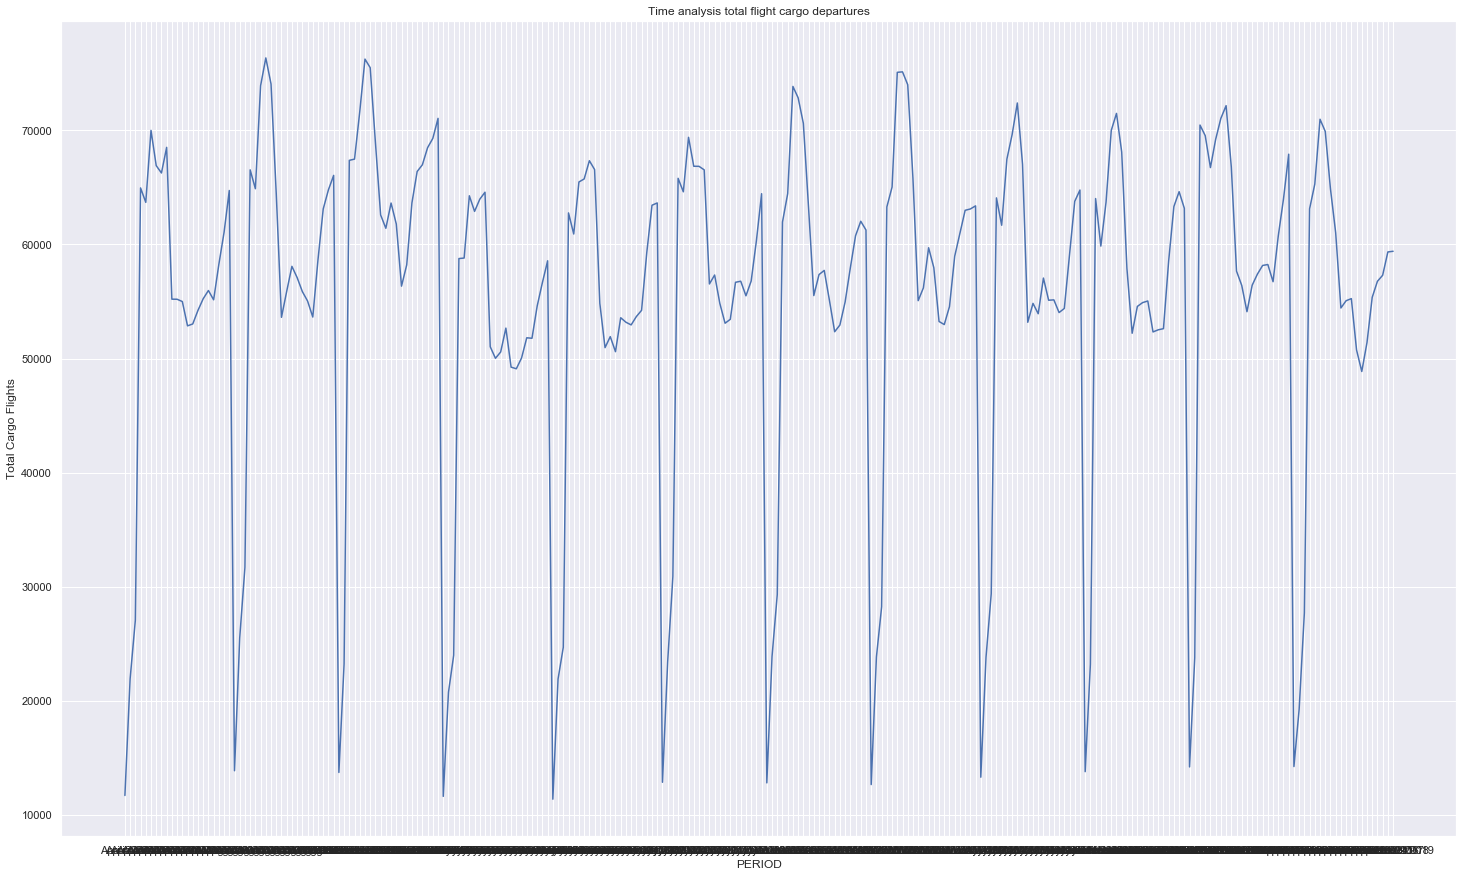

In [22]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_cargo.index, y=combined_cargo['Total Cargo Flights'])

plt.title("Time analysis total flight cargo departures")

Similar to passenger, yet seems rather unaffected by time. Remains pretty static over time.

Text(0.5, 1.0, 'Time analysis total domestic flight cargo departures')

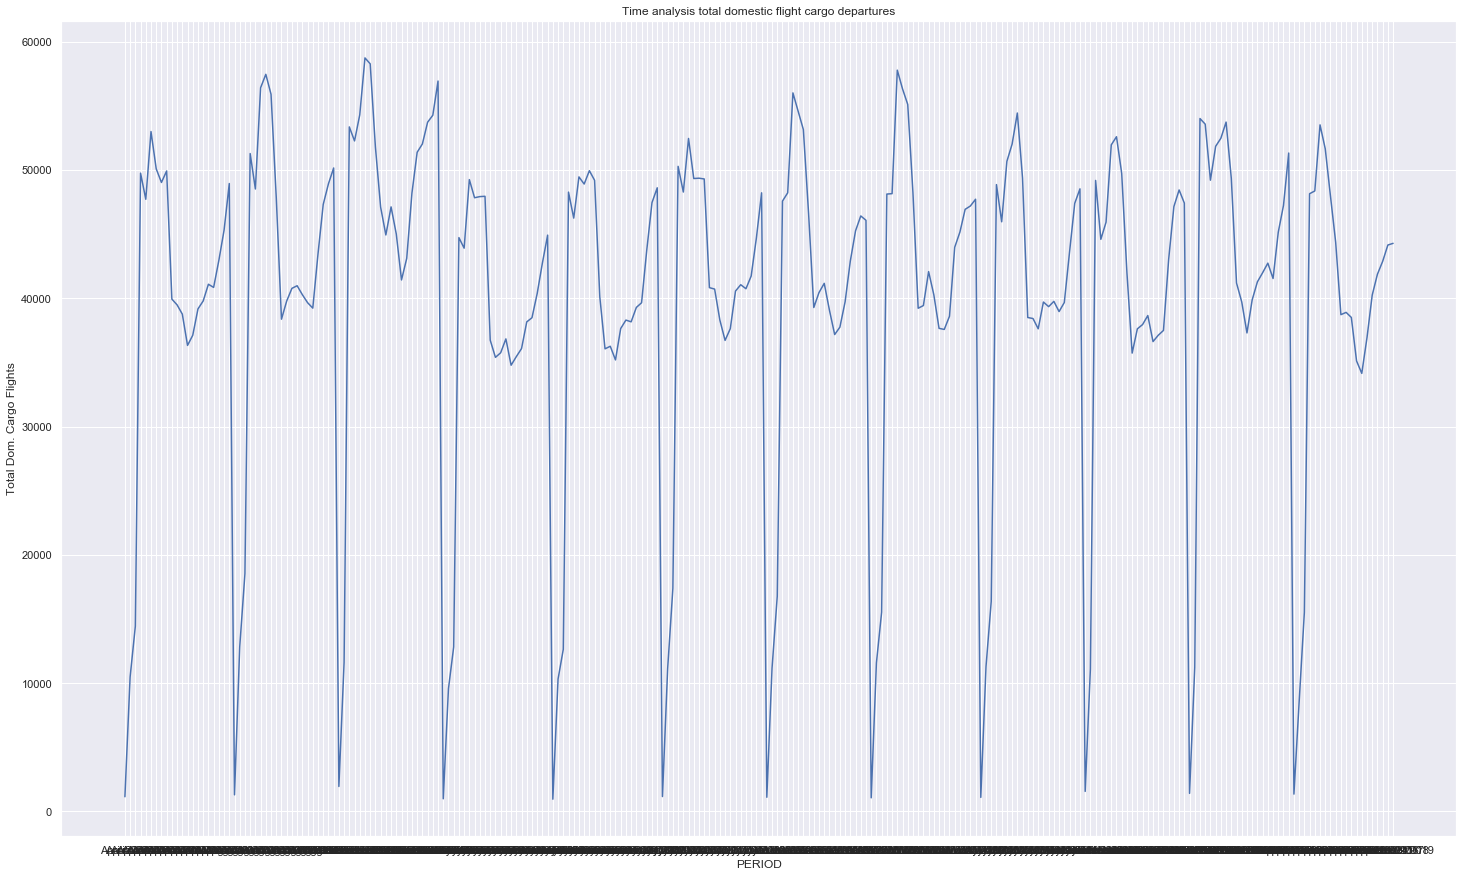

In [23]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_cargo.index, y=combined_cargo['Total Dom. Cargo Flights'].astype(float))

plt.title("Time analysis total domestic flight cargo departures")

Text(0.5, 1.0, 'Time analysis total international flight cargo departures')

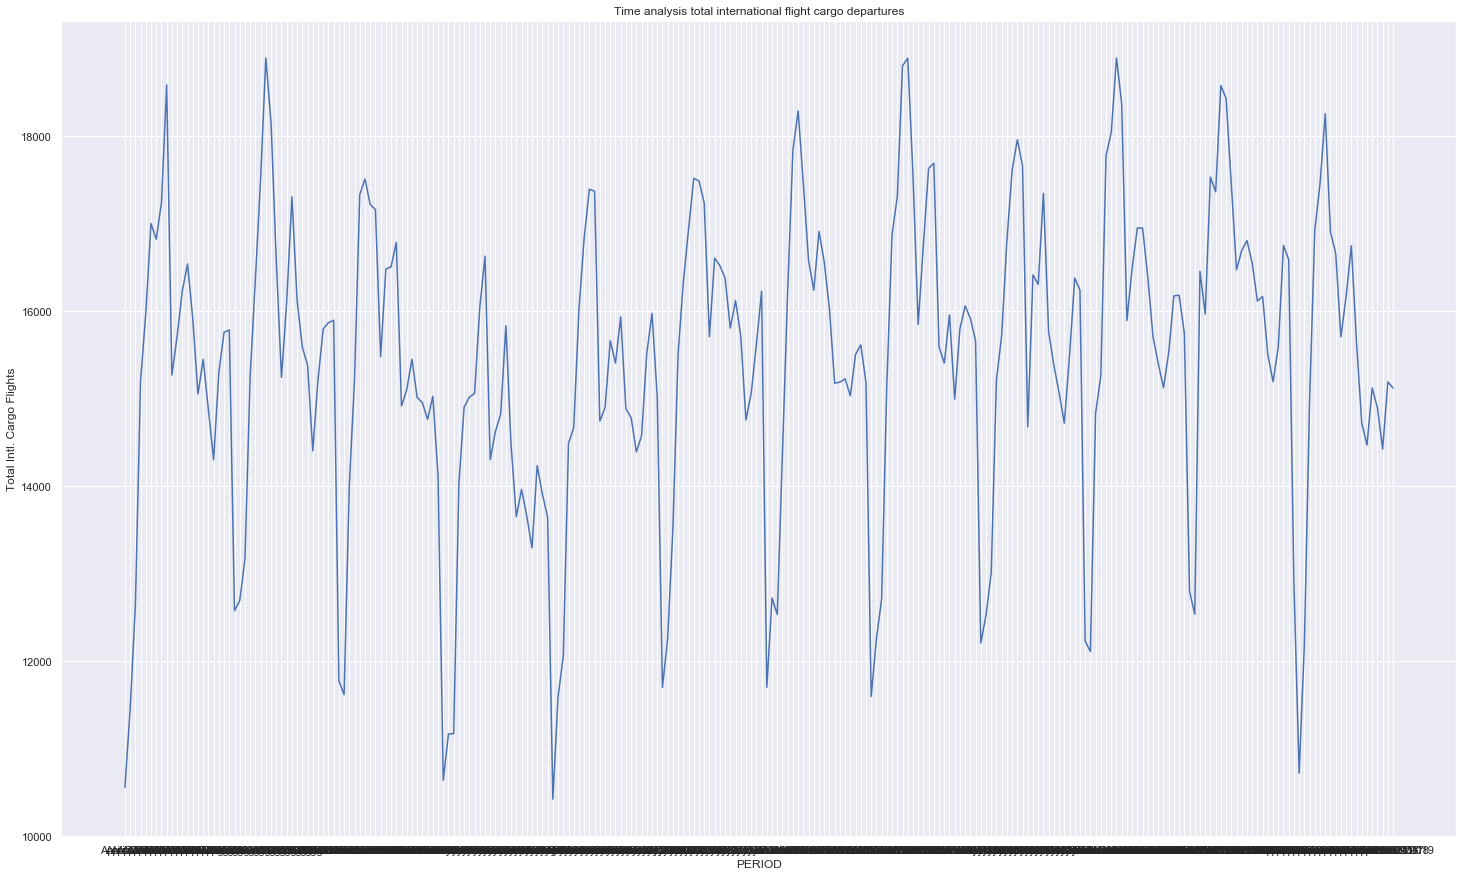

In [24]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

ax = sns.lineplot(x=combined_cargo.index, y=combined_cargo['Total Intl. Cargo Flights'].astype(float))

plt.title("Time analysis total international flight cargo departures")

International cargo flights seem to be less stable, but seems to be unaffected by COVID.